#### Research Questions: <br>
1. Which counties have poor health status?  <br>
2. What factors contribute most to health status?

In [1]:
import pandas as pd
import numpy as np

### take needed colums from each csv files <br>
1. DEMOGRAPHICS
2. SummaryMeasuresOfHealth
3. VunerablePopsAndEnvHealth
4. PreventiveServicesUse
5. RiskFactorsAndAccessToCare


### Process DEMOGRAPHICS file

In [2]:
df_demo=pd.read_csv("DEMOGRAPHICS.csv")

In [3]:
df_demo.head()

State_FIPS_Code  County_FIPS_Code CHSI_County_Name CHSI_State_Name  \
0                1                 1          Autauga         Alabama   
1                1                 3          Baldwin         Alabama   
2                1                 5          Barbour         Alabama   
3                1                 7             Bibb         Alabama   
4                1                 9           Blount         Alabama   

  CHSI_State_Abbr  Strata_ID_Number  \
0              AL                29   
1              AL                16   
2              AL                51   
3              AL                42   
4              AL                28   

                          Strata_Determining_Factors  Number_Counties  \
0     frontier status, population size, poverty, age               37   
1     frontier status, population size, poverty, age               27   
2  frontier status, population size, poverty, age...               33   
3     frontier status, population size, poverty, age               53   
4     frontier status, population size, poverty, age               39   

   Population_Size  Min_Population_Size  ...  Max_Black  Native_American  \
0            48612                28447  ...       17.3              0.5   
1           162586               118395  ...       14.1              0.5   
2            28414                27269  ...       50.7              0.4   
3            21516                 8134  ...       35.4              0.3   
4            55725                29009  ...       20.5              0.5   

   Min_Native_American  Max_Native_American  Asian  Min_Asian  Max_Asian  \
0                  0.1                  1.1    0.6        0.2        2.2   
1                  0.1                  1.1    0.4        0.4        3.3   
2                  0.2                  7.1    0.3        0.2        2.3   
3                  0.1                  2.6    0.1        0.1        1.5   
4                  0.1                  0.9    0.2        0.3        2.2   

   Hispanic  Min_Hispanic  Max_Hispanic  
0       1.7           0.8          19.2  
1       2.3           0.8          13.7  
2       3.1           1.0          67.7  
3       1.4           1.2          46.9  
4       6.3           0.8           6.3  

[5 rows x 44 columns]

In [4]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State_FIPS_Code             3141 non-null   int64  
 1   County_FIPS_Code            3141 non-null   int64  
 2   CHSI_County_Name            3141 non-null   object 
 3   CHSI_State_Name             3141 non-null   object 
 4   CHSI_State_Abbr             3141 non-null   object 
 5   Strata_ID_Number            3141 non-null   int64  
 6   Strata_Determining_Factors  3141 non-null   object 
 7   Number_Counties             3141 non-null   int64  
 8   Population_Size             3141 non-null   int64  
 9   Min_Population_Size         3141 non-null   int64  
 10  Max_Population_Size         3141 non-null   int64  
 11  Population_Density          3141 non-null   int64  
 12  Min_Population_Density      3141 non-null   int64  
 13  Max_Population_Density      3141 

In [4]:
df_demo["id"]=df_demo["CHSI_County_Name"]+"_"+df_demo["CHSI_State_Name"]

In [5]:
## take needed columns
ls=["id", "Strata_ID_Number","Population_Density", "Poverty",\
    "Age_19_Under", "Age_19_64", "Age_65_84", "Age_85_and_Over", "Max_Age_85_and_Over"]


df_demo_keep=df_demo[ls]
print(df_demo_keep.info())
df_demo_keep.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   3141 non-null   object 
 1   Strata_ID_Number     3141 non-null   int64  
 2   Population_Density   3141 non-null   int64  
 3   Poverty              3141 non-null   float64
 4   Age_19_Under         3141 non-null   float64
 5   Age_19_64            3141 non-null   float64
 6   Age_65_84            3141 non-null   float64
 7   Age_85_and_Over      3141 non-null   float64
 8   Max_Age_85_and_Over  3141 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 221.0+ KB
None


id  Strata_ID_Number  Population_Density  Poverty  \
0  Autauga_Alabama                29                  82     10.4   
1  Baldwin_Alabama                16                 102     10.2   
2  Barbour_Alabama                51                  32     22.1   

   Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  Max_Age_85_and_Over  
0          26.9       62.3        9.8              0.9                  2.1  
1          23.5       60.3       14.5              1.8                  3.4  
2          24.3       62.5       11.6              1.6                  1.8

In [6]:
len(df_demo_keep["id"].unique())

3141

### Process health status file

In [7]:
## import file
df_status=pd.read_csv("SummaryMeasuresOfHealth.csv")
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State_FIPS_Code        3141 non-null   int64  
 1   County_FIPS_Code       3141 non-null   int64  
 2   CHSI_County_Name       3141 non-null   object 
 3   CHSI_State_Name        3141 non-null   object 
 4   CHSI_State_Abbr        3141 non-null   object 
 5   Strata_ID_Number       3141 non-null   int64  
 6   ALE                    3141 non-null   float64
 7   Min_ALE                3141 non-null   float64
 8   Max_ALE                3141 non-null   float64
 9   US_ALE                 3141 non-null   float64
 10  All_Death              3141 non-null   float64
 11  Min_All_Death          3141 non-null   float64
 12  Max_All_Death          3141 non-null   float64
 13  US_All_Death           3141 non-null   float64
 14  CI_Min_All_Death       3141 non-null   float64
 15  CI_M

In [8]:
df_status["id"]=df_status["CHSI_County_Name"]+"_"+df_status["CHSI_State_Name"]

In [9]:
## keep needed colmuns
ls_health=['id', 'Health_Status','Unhealthy_Days']
df_status_keep=df_status[ls_health]
print(df_status_keep.info())
df_status_keep.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3141 non-null   object 
 1   Health_Status   3141 non-null   float64
 2   Unhealthy_Days  3141 non-null   float64
dtypes: float64(2), object(1)
memory usage: 73.7+ KB
None


id  Health_Status  Unhealthy_Days
0  Autauga_Alabama           21.8             7.5
1  Baldwin_Alabama           15.4             6.7
2  Barbour_Alabama           21.4         -1111.1

### process VunerablePopsAndEnvHealth

In [10]:
## import file
df_vun_env=pd.read_csv("VunerablePopsAndEnvHealth.csv")
df_vun_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State_FIPS_Code         3141 non-null   int64 
 1   County_FIPS_Code        3141 non-null   int64 
 2   CHSI_County_Name        3141 non-null   object
 3   CHSI_State_Name         3141 non-null   object
 4   CHSI_State_Abbr         3141 non-null   object
 5   Strata_ID_Number        3141 non-null   int64 
 6   No_HS_Diploma           3141 non-null   int64 
 7   Unemployed              3141 non-null   int64 
 8   Sev_Work_Disabled       3141 non-null   int64 
 9   Major_Depression        3141 non-null   int64 
 10  Recent_Drug_Use         3141 non-null   int64 
 11  Ecol_Rpt                3141 non-null   int64 
 12  Ecol_Rpt_Ind            3141 non-null   int64 
 13  Ecol_Exp                3141 non-null   int64 
 14  Salm_Rpt                3141 non-null   int64 
 15  Salm

In [11]:
df_vun_env["id"]=df_vun_env["CHSI_County_Name"]+"_"+df_vun_env["CHSI_State_Name"]

In [12]:
ls_vun_env=["id", "Unemployed", "Sev_Work_Disabled", "Major_Depression", "Recent_Drug_Use", \
           "Ecol_Rpt", "Salm_Rpt", "Shig_Rpt", "Toxic_Chem", "Carbon_Monoxide_Ind", "Nitrogen_Dioxide_Ind", \
           "Sulfur_Dioxide_Ind", "Ozone_Ind", "Particulate_Matter_Ind", "Lead_Ind"]
df_vun_env_keep=df_vun_env[ls_vun_env]
print(df_vun_env_keep.info())
df_vun_env_keep.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      3141 non-null   object
 1   Unemployed              3141 non-null   int64 
 2   Sev_Work_Disabled       3141 non-null   int64 
 3   Major_Depression        3141 non-null   int64 
 4   Recent_Drug_Use         3141 non-null   int64 
 5   Ecol_Rpt                3141 non-null   int64 
 6   Salm_Rpt                3141 non-null   int64 
 7   Shig_Rpt                3141 non-null   int64 
 8   Toxic_Chem              3141 non-null   int64 
 9   Carbon_Monoxide_Ind     3141 non-null   int64 
 10  Nitrogen_Dioxide_Ind    3141 non-null   int64 
 11  Sulfur_Dioxide_Ind      3141 non-null   int64 
 12  Ozone_Ind               3141 non-null   int64 
 13  Particulate_Matter_Ind  3141 non-null   int64 
 14  Lead_Ind                3141 non-null   int64 
dtypes: i

id  Unemployed  Sev_Work_Disabled  Major_Depression  \
0  Autauga_Alabama         774               1727              2680   
1  Baldwin_Alabama        2533               4933              9354   
2  Barbour_Alabama         569               1302              1618   

   Recent_Drug_Use  Ecol_Rpt  Salm_Rpt  Shig_Rpt  Toxic_Chem  \
0             2394         2        50         4     2883197   
1             7753         2        99        41       35664   
2             1403         0        53         1       49874   

   Carbon_Monoxide_Ind  Nitrogen_Dioxide_Ind  Sulfur_Dioxide_Ind  Ozone_Ind  \
0                    1                     1                   1          1   
1                    1                     1                   1          2   
2                    1                     1                   1          1   

   Particulate_Matter_Ind  Lead_Ind  
0                       1         1  
1                       1         1  
2                       1         1

### process PreventiveServicesUse

In [13]:
## import file
df_prevent=pd.read_csv("PreventiveServicesUse.csv")
df_prevent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_FIPS_Code     3141 non-null   int64  
 1   County_FIPS_Code    3141 non-null   int64  
 2   CHSI_County_Name    3141 non-null   object 
 3   CHSI_State_Name     3141 non-null   object 
 4   CHSI_State_Abbr     3141 non-null   object 
 5   Strata_ID_Number    3141 non-null   int64  
 6   FluB_Rpt            3141 non-null   int64  
 7   FluB_Ind            3141 non-null   int64  
 8   FluB_Exp            3141 non-null   int64  
 9   HepA_Rpt            3141 non-null   int64  
 10  HepA_Ind            3141 non-null   int64  
 11  HepA_Exp            3141 non-null   int64  
 12  HepB_Rpt            3141 non-null   int64  
 13  HepB_Ind            3141 non-null   int64  
 14  HepB_Exp            3141 non-null   int64  
 15  Meas_Rpt            3141 non-null   int64  
 16  Meas_I

In [14]:
df_prevent["id"]=df_prevent["CHSI_County_Name"]+"_"+df_prevent["CHSI_State_Name"]

In [15]:
ls_prevent=["id", "FluB_Rpt", "HepA_Rpt", "HepB_Rpt", "Meas_Rpt", "Pert_Rpt", "CRS_Rpt", "Syphilis_Rpt", \
            "Pap_Smear", "Mammogram", "Proctoscopy", "Pneumo_Vax", "Flu_Vac"]

df_prevent_keep=df_prevent[ls_prevent]
print(df_prevent_keep.info())
df_prevent_keep.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3141 non-null   object 
 1   FluB_Rpt      3141 non-null   int64  
 2   HepA_Rpt      3141 non-null   int64  
 3   HepB_Rpt      3141 non-null   int64  
 4   Meas_Rpt      3141 non-null   int64  
 5   Pert_Rpt      3141 non-null   int64  
 6   CRS_Rpt       3141 non-null   int64  
 7   Syphilis_Rpt  3141 non-null   int64  
 8   Pap_Smear     3141 non-null   float64
 9   Mammogram     3141 non-null   float64
 10  Proctoscopy   3141 non-null   float64
 11  Pneumo_Vax    3141 non-null   float64
 12  Flu_Vac       3141 non-null   float64
dtypes: float64(5), int64(7), object(1)
memory usage: 319.1+ KB
None


id  FluB_Rpt  HepA_Rpt  HepB_Rpt  Meas_Rpt  Pert_Rpt  CRS_Rpt  \
0  Autauga_Alabama         0         1         2         0         3        0   
1  Baldwin_Alabama         0         2        17         0         0        0   
2  Barbour_Alabama         0         2         0         0         0        0   

   Syphilis_Rpt  Pap_Smear  Mammogram  Proctoscopy  Pneumo_Vax  Flu_Vac  
0             8    -1111.1    -1111.1      -1111.1     -1111.1  -1111.1  
1             0       86.1       82.0         44.1        58.7     61.8  
2             6    -1111.1    -1111.1      -1111.1     -1111.1  -1111.1

### process RiskFactorsAndAccessToCare

In [16]:
## import file
df_risk=pd.read_csv("RiskFactorsAndAccessToCare.csv")
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State_FIPS_Code              3141 non-null   int64  
 1   County_FIPS_Code             3141 non-null   int64  
 2   CHSI_County_Name             3141 non-null   object 
 3   CHSI_State_Name              3141 non-null   object 
 4   CHSI_State_Abbr              3141 non-null   object 
 5   Strata_ID_Number             3141 non-null   int64  
 6   No_Exercise                  3141 non-null   float64
 7   CI_Min_No_Exercise           3141 non-null   float64
 8   CI_Max_No_Exercise           3141 non-null   float64
 9   Few_Fruit_Veg                3141 non-null   float64
 10  CI_Min_Fruit_Veg             3141 non-null   float64
 11  CI_Max_Fruit_Veg             3141 non-null   float64
 12  Obesity                      3141 non-null   float64
 13  CI_Min_Obesity    

In [17]:
df_risk["id"]=df_risk["CHSI_County_Name"]+"_"+df_risk["CHSI_State_Name"]

In [18]:
ls_risk=["id", "No_Exercise", "Few_Fruit_Veg", "Obesity", "High_Blood_Pres", "Smoker", "Diabetes",\
         "Uninsured","Elderly_Medicare", "Disabled_Medicare", "Prim_Care_Phys_Rate", "Dentist_Rate", \
         "Community_Health_Center_Ind","HPSA_Ind"]

df_risk_keep=df_risk[ls_risk]
print(df_risk_keep.info())
df_risk_keep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3141 non-null   object 
 1   No_Exercise                  3141 non-null   float64
 2   Few_Fruit_Veg                3141 non-null   float64
 3   Obesity                      3141 non-null   float64
 4   High_Blood_Pres              3141 non-null   float64
 5   Smoker                       3141 non-null   float64
 6   Diabetes                     3141 non-null   float64
 7   Uninsured                    3141 non-null   int64  
 8   Elderly_Medicare             3141 non-null   int64  
 9   Disabled_Medicare            3141 non-null   int64  
 10  Prim_Care_Phys_Rate          3141 non-null   float64
 11  Dentist_Rate                 3141 non-null   float64
 12  Community_Health_Center_Ind  3141 non-null   int64  
 13  HPSA_Ind          

id  No_Exercise  Few_Fruit_Veg  Obesity  High_Blood_Pres  \
0  Autauga_Alabama         27.8           78.6     24.5             29.1   
1  Baldwin_Alabama         27.2           76.2     23.6             30.5   
2  Barbour_Alabama      -1111.1        -1111.1     25.6          -1111.1   
3     Bibb_Alabama      -1111.1           86.6  -1111.1          -1111.1   
4   Blount_Alabama         33.5           74.6     24.2          -1111.1   

   Smoker  Diabetes  Uninsured  Elderly_Medicare  Disabled_Medicare  \
0    26.6      14.2       5690              4762               1209   
1    24.6       7.2      19798             22635               3839   
2    17.7       6.6       5126              3288               1092   
3 -1111.1      13.1       3315              2390                974   
4    23.6       8.4       8131              5019               1300   

   Prim_Care_Phys_Rate  Dentist_Rate  Community_Health_Center_Ind  HPSA_Ind  
0                 45.3          22.6                            1         2  
1                 67.0          30.8                            1         2  
2                 45.8          24.6                            1         2  
3                 41.8          18.6                            1         1  
4                 16.2          10.8                            2         1

### Merge data frame

In [72]:
## not corect!!!
## use (), unique()
#df_vun_env_keep["CHSI_County_Name"].unique

<bound method Series.unique of 0          Autauga
1          Baldwin
2          Barbour
3             Bibb
4           Blount
           ...    
3136    Sweetwater
3137         Teton
3138         Uinta
3139      Washakie
3140        Weston
Name: CHSI_County_Name, Length: 3141, dtype: object>

In [71]:
#len(df_vun_env_keep["CHSI_County_Name"].unique())

1847

In [69]:
#df_vun_env_keep["CHSI_County_Name"].value_counts()

Washington              32
Jefferson               26
Franklin                25
Lincoln                 24
Jackson                 24
                        ..
St. Croix                1
Athens                   1
St. John the Baptist     1
Tama                     1
Niobrara                 1
Name: CHSI_County_Name, Length: 1847, dtype: int64

In [19]:
# merge demographic(1) and VunerablePopsAndEnvHealth(3)
f0 = pd.merge(df_demo_keep, df_vun_env_keep, on='id')
print(f0.info())
f0.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3141 non-null   object 
 1   Strata_ID_Number        3141 non-null   int64  
 2   Population_Density      3141 non-null   int64  
 3   Poverty                 3141 non-null   float64
 4   Age_19_Under            3141 non-null   float64
 5   Age_19_64               3141 non-null   float64
 6   Age_65_84               3141 non-null   float64
 7   Age_85_and_Over         3141 non-null   float64
 8   Max_Age_85_and_Over     3141 non-null   float64
 9   Unemployed              3141 non-null   int64  
 10  Sev_Work_Disabled       3141 non-null   int64  
 11  Major_Depression        3141 non-null   int64  
 12  Recent_Drug_Use         3141 non-null   int64  
 13  Ecol_Rpt                3141 non-null   int64  
 14  Salm_Rpt                3141 non-null   

id  Strata_ID_Number  Population_Density  Poverty  \
0  Autauga_Alabama                29                  82     10.4   
1  Baldwin_Alabama                16                 102     10.2   
2  Barbour_Alabama                51                  32     22.1   

   Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  Max_Age_85_and_Over  \
0          26.9       62.3        9.8              0.9                  2.1   
1          23.5       60.3       14.5              1.8                  3.4   
2          24.3       62.5       11.6              1.6                  1.8   

   Unemployed  ...  Ecol_Rpt  Salm_Rpt  Shig_Rpt  Toxic_Chem  \
0         774  ...         2        50         4     2883197   
1        2533  ...         2        99        41       35664   
2         569  ...         0        53         1       49874   

   Carbon_Monoxide_Ind  Nitrogen_Dioxide_Ind  Sulfur_Dioxide_Ind  Ozone_Ind  \
0                    1                     1                   1          1   
1                    1                     1                   1          2   
2                    1                     1                   1          1   

   Particulate_Matter_Ind  Lead_Ind  
0                       1         1  
1                       1         1  
2                       1         1  

[3 rows x 23 columns]

In [20]:
## merge previous data frame(f0) with PreventiveServicesUse
f1 = pd.merge(f0, df_prevent_keep, on='id')
print(f1.info())
f1.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3141 non-null   object 
 1   Strata_ID_Number        3141 non-null   int64  
 2   Population_Density      3141 non-null   int64  
 3   Poverty                 3141 non-null   float64
 4   Age_19_Under            3141 non-null   float64
 5   Age_19_64               3141 non-null   float64
 6   Age_65_84               3141 non-null   float64
 7   Age_85_and_Over         3141 non-null   float64
 8   Max_Age_85_and_Over     3141 non-null   float64
 9   Unemployed              3141 non-null   int64  
 10  Sev_Work_Disabled       3141 non-null   int64  
 11  Major_Depression        3141 non-null   int64  
 12  Recent_Drug_Use         3141 non-null   int64  
 13  Ecol_Rpt                3141 non-null   int64  
 14  Salm_Rpt                3141 non-null   

id  Strata_ID_Number  Population_Density  Poverty  \
0  Autauga_Alabama                29                  82     10.4   
1  Baldwin_Alabama                16                 102     10.2   
2  Barbour_Alabama                51                  32     22.1   

   Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  Max_Age_85_and_Over  \
0          26.9       62.3        9.8              0.9                  2.1   
1          23.5       60.3       14.5              1.8                  3.4   
2          24.3       62.5       11.6              1.6                  1.8   

   Unemployed  ...  HepB_Rpt  Meas_Rpt  Pert_Rpt  CRS_Rpt  Syphilis_Rpt  \
0         774  ...         2         0         3        0             8   
1        2533  ...        17         0         0        0             0   
2         569  ...         0         0         0        0             6   

   Pap_Smear  Mammogram  Proctoscopy  Pneumo_Vax  Flu_Vac  
0    -1111.1    -1111.1      -1111.1     -1111.1  -1111.1  
1       86.1       82.0         44.1        58.7     61.8  
2    -1111.1    -1111.1      -1111.1     -1111.1  -1111.1  

[3 rows x 35 columns]

In [21]:
## merge previous data frame(f1) with PreventiveServicesUse
f2 = pd.merge(f1, df_risk_keep, on='id')
print(f2.info())
f2.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3141 non-null   object 
 1   Strata_ID_Number             3141 non-null   int64  
 2   Population_Density           3141 non-null   int64  
 3   Poverty                      3141 non-null   float64
 4   Age_19_Under                 3141 non-null   float64
 5   Age_19_64                    3141 non-null   float64
 6   Age_65_84                    3141 non-null   float64
 7   Age_85_and_Over              3141 non-null   float64
 8   Max_Age_85_and_Over          3141 non-null   float64
 9   Unemployed                   3141 non-null   int64  
 10  Sev_Work_Disabled            3141 non-null   int64  
 11  Major_Depression             3141 non-null   int64  
 12  Recent_Drug_Use              3141 non-null   int64  
 13  Ecol_Rpt          

id  Strata_ID_Number  Population_Density  Poverty  \
0  Autauga_Alabama                29                  82     10.4   
1  Baldwin_Alabama                16                 102     10.2   
2  Barbour_Alabama                51                  32     22.1   

   Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  Max_Age_85_and_Over  \
0          26.9       62.3        9.8              0.9                  2.1   
1          23.5       60.3       14.5              1.8                  3.4   
2          24.3       62.5       11.6              1.6                  1.8   

   Unemployed  ...  High_Blood_Pres  Smoker  Diabetes  Uninsured  \
0         774  ...             29.1    26.6      14.2       5690   
1        2533  ...             30.5    24.6       7.2      19798   
2         569  ...          -1111.1    17.7       6.6       5126   

   Elderly_Medicare  Disabled_Medicare  Prim_Care_Phys_Rate  Dentist_Rate  \
0              4762               1209                 45.3          22.6   
1             22635               3839                 67.0          30.8   
2              3288               1092                 45.8          24.6   

   Community_Health_Center_Ind  HPSA_Ind  
0                            1         2  
1                            1         2  
2                            1         2  

[3 rows x 48 columns]

In [22]:
## merge previous data frame(f2) with SummaryMeasuresOfHealth
final = pd.merge(f2, df_status_keep, on='id')
print(final.info())
final.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3141 non-null   object 
 1   Strata_ID_Number             3141 non-null   int64  
 2   Population_Density           3141 non-null   int64  
 3   Poverty                      3141 non-null   float64
 4   Age_19_Under                 3141 non-null   float64
 5   Age_19_64                    3141 non-null   float64
 6   Age_65_84                    3141 non-null   float64
 7   Age_85_and_Over              3141 non-null   float64
 8   Max_Age_85_and_Over          3141 non-null   float64
 9   Unemployed                   3141 non-null   int64  
 10  Sev_Work_Disabled            3141 non-null   int64  
 11  Major_Depression             3141 non-null   int64  
 12  Recent_Drug_Use              3141 non-null   int64  
 13  Ecol_Rpt          

id  Strata_ID_Number  Population_Density  Poverty  \
0  Autauga_Alabama                29                  82     10.4   
1  Baldwin_Alabama                16                 102     10.2   
2  Barbour_Alabama                51                  32     22.1   

   Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  Max_Age_85_and_Over  \
0          26.9       62.3        9.8              0.9                  2.1   
1          23.5       60.3       14.5              1.8                  3.4   
2          24.3       62.5       11.6              1.6                  1.8   

   Unemployed  ...  Diabetes  Uninsured  Elderly_Medicare  Disabled_Medicare  \
0         774  ...      14.2       5690              4762               1209   
1        2533  ...       7.2      19798             22635               3839   
2         569  ...       6.6       5126              3288               1092   

   Prim_Care_Phys_Rate  Dentist_Rate  Community_Health_Center_Ind  HPSA_Ind  \
0                 45.3          22.6                            1         2   
1                 67.0          30.8                            1         2   
2                 45.8          24.6                            1         2   

   Health_Status  Unhealthy_Days  
0           21.8             7.5  
1           15.4             6.7  
2           21.4         -1111.1  

[3 rows x 50 columns]

### Save to files

In [94]:
final.to_csv('combine_df.csv', header = True, index = False)

In [24]:
### save to excel
final.to_excel('combine_df.csv.xlsx')

### Read final data frame csv file

In [25]:
df=pd.read_csv('combine_df.csv')

In [100]:
df.head(3)

id  Strata_ID_Number  Population_Density  Poverty  \
0  Autauga_Alabama                29                  82     10.4   
1  Baldwin_Alabama                16                 102     10.2   
2  Barbour_Alabama                51                  32     22.1   

   Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  Max_Age_85_and_Over  \
0          26.9       62.3        9.8              0.9                  2.1   
1          23.5       60.3       14.5              1.8                  3.4   
2          24.3       62.5       11.6              1.6                  1.8   

   Unemployed  ...  Diabetes  Uninsured  Elderly_Medicare  Disabled_Medicare  \
0         774  ...      14.2       5690              4762               1209   
1        2533  ...       7.2      19798             22635               3839   
2         569  ...       6.6       5126              3288               1092   

   Prim_Care_Phys_Rate  Dentist_Rate  Community_Health_Center_Ind  HPSA_Ind  \
0                 45.3          22.6                            1         2   
1                 67.0          30.8                            1         2   
2                 45.8          24.6                            1         2   

   Health_Status  Unhealthy_Days  
0           21.8             7.5  
1           15.4             6.7  
2           21.4         -1111.1  

[3 rows x 50 columns]

In [106]:
## check the no report data
df[(df["Health_Status"]== -1111.1) | (df["Health_Status"]==-1111) | (df["Health_Status"]==-1)]

id  Strata_ID_Number  Population_Density  Poverty  \
5         Bullock_Alabama                75                  18     26.2   
9        Cherokee_Alabama                64                  44     15.2   
12         Clarke_Alabama                51                  22     19.2   
13           Clay_Alabama                63                  23     14.0   
14       Cleburne_Alabama                41                  26     14.0   
...                   ...               ...                 ...      ...   
3066     Forest_Wisconsin                40                  10     10.0   
3071       Iron_Wisconsin                54                   9      9.6   
3085  Menominee_Wisconsin                66                  13     19.3   
3092      Pepin_Wisconsin                57                  32      8.1   
3096      Price_Wisconsin                54                  12      9.0   

      Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  \
5             24.7       63.2       10.0              2.2   
9             21.9       61.4       15.2              1.4   
12            27.3       58.5       12.4              1.8   
13            22.4       60.3       14.9              2.5   
14            23.3       62.6       12.8              1.4   
...            ...        ...        ...              ...   
3066          23.9       55.5       17.8              2.8   
3071          17.5       58.3       19.9              4.3   
3085          36.5       53.7        9.4              0.5   
3092          24.0       59.4       14.1              2.5   
3096          20.9       59.6       16.2              3.3   

      Max_Age_85_and_Over  Unemployed  ...  Diabetes  Uninsured  \
5                     2.6         327  ...   -1111.1       2295   
9                     2.9         464  ...      13.3       3583   
12                    1.8         594  ...      15.8       4593   
13                    3.3         266  ...      12.2       2320   
14                    3.3         234  ...      10.5       2107   
...                   ...         ...  ...       ...        ...   
3066                  3.7         342  ...       9.2       1190   
3071                  4.8         259  ...   -1111.1        856   
3085                  2.0         164  ...   -1111.1       1177   
3092                  3.3         205  ...   -1111.1        680   
3096                  4.8         426  ...       3.4       1478   

      Elderly_Medicare  Disabled_Medicare  Prim_Care_Phys_Rate  Dentist_Rate  \
5                 1433                504                 54.3          18.1   
9                 3086                854                 28.5          12.2   
12                3850               1150                 55.0          29.3   
13                2198                610                 35.8          14.3   
14                1852                646                  0.0           6.9   
...                ...                ...                  ...           ...   
3066              1829                263                 40.2          30.1   
3071              1395                198                 45.1          60.2   
3085               437                107                 65.5          43.7   
3092              1265                121                 67.8          40.7   
3096              2945                386                 72.3          39.4   

      Community_Health_Center_Ind  HPSA_Ind  Health_Status  Unhealthy_Days  
5                               1         1        -1111.1         -1111.1  
9                               2         1        -1111.1             8.8  
12                              2         2        -1111.1             5.8  
13                              2         1        -1111.1             7.1  
14                              2         1        -1111.1             8.0  
...                           ...       ...            ...             ...  
3066                            2         1        -1111.1             6

In [107]:
df[(df["Health_Status"]== -2222.2) | (df["Health_Status"]==-2222) | (df["Health_Status"]==-2)]

Empty DataFrame
Columns: [id, Strata_ID_Number, Population_Density, Poverty, Age_19_Under, Age_19_64, Age_65_84, Age_85_and_Over, Max_Age_85_and_Over, Unemployed, Sev_Work_Disabled, Major_Depression, Recent_Drug_Use, Ecol_Rpt, Salm_Rpt, Shig_Rpt, Toxic_Chem, Carbon_Monoxide_Ind, Nitrogen_Dioxide_Ind, Sulfur_Dioxide_Ind, Ozone_Ind, Particulate_Matter_Ind, Lead_Ind, FluB_Rpt, HepA_Rpt, HepB_Rpt, Meas_Rpt, Pert_Rpt, CRS_Rpt, Syphilis_Rpt, Pap_Smear, Mammogram, Proctoscopy, Pneumo_Vax, Flu_Vac, No_Exercise, Few_Fruit_Veg, Obesity, High_Blood_Pres, Smoker, Diabetes, Uninsured, Elderly_Medicare, Disabled_Medicare, Prim_Care_Phys_Rate, Dentist_Rate, Community_Health_Center_Ind, HPSA_Ind, Health_Status, Unhealthy_Days]
Index: []

[0 rows x 50 columns]

In [109]:
df[(df["Health_Status"]!= -1111.1)]

id  Strata_ID_Number  Population_Density  Poverty  \
0        Autauga_Alabama                29                  82     10.4   
1        Baldwin_Alabama                16                 102     10.2   
2        Barbour_Alabama                51                  32     22.1   
3           Bibb_Alabama                42                  35     16.8   
4         Blount_Alabama                28                  86     11.9   
...                  ...               ...                 ...      ...   
3136  Sweetwater_Wyoming                77                   4      8.6   
3137       Teton_Wyoming                78                   5      5.6   
3138       Uinta_Wyoming                38                  10     10.6   
3139    Washakie_Wyoming                82                   4     11.1   
3140      Weston_Wyoming                78                   3      9.9   

      Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  \
0             26.9       62.3        9.8              0.9   
1             23.5       60.3       14.5              1.8   
2             24.3       62.5       11.6              1.6   
3             24.6       63.3       10.9              1.2   
4             24.5       62.1       12.1              1.3   
...            ...        ...        ...              ...   
3136          26.6       65.1        7.4              0.9   
3137          18.8       73.3        7.5              0.4   
3138          29.1       63.1        7.0              0.8   
3139          23.5       59.5       14.6              2.3   
3140          20.1       63.2       14.4              2.4   

      Max_Age_85_and_Over  Unemployed  ...  Diabetes  Uninsured  \
0                     2.1         774  ...      14.2       5690   
1                     3.4        2533  ...       7.2      19798   
2                     1.8         569  ...       6.6       5126   
3                     2.1         358  ...      13.1       3315   
4                     2.1         819  ...       8.4       8131   
...                   ...         ...  ...       ...        ...   
3136                  2.3         688  ...       5.3       5477   
3137                  2.3         437  ...       2.4       1846   
3138                  2.2         389  ...       4.8       3007   
3139                  4.5         182  ...       9.4       1178   
3140                  2.3         128  ...       5.7        867   

      Elderly_Medicare  Disabled_Medicare  Prim_Care_Phys_Rate  Dentist_Rate  \
0                 4762               1209                 45.3          22.6   
1                22635               3839                 67.0          30.8   
2                 3288               1092                 45.8          24.6   
3                 2390                974                 41.8          18.6   
4                 5019               1300                 16.2          10.8   
...                ...                ...                  ...           ...   
3136              3260                572                 50.0          52.7   
3137              1393                 82                147.1          57.8   
3138              1431                357                 65.2          40.1   
3139              1338                136                 50.4          50.4   
3140              1072                143                 45.0          30.0   

      Community_Health_Center_Ind  HPSA_Ind  Health_Status  Unhealthy_Days  
0                               1         2           21.8             7.5  
1                               1         2           15.4             6.7  
2                               1         2           21.4         -1111.1  
3                               1         1           19.4         -1111.1  
4                               2         1           25.8             7.9  
...                           ...       ...            ...             ...  
3136                            2         1           12.1             6.2  
3137  

### build a bar plot for health status

In [26]:
data =df[df["Health_Status"]!= -1111.1]["Health_Status"]
data

0       21.8
1       15.4
2       21.4
3       19.4
4       25.8
        ... 
3136    12.1
3137     6.0
3138    12.6
3139    14.9
3140    16.1
Name: Health_Status, Length: 2477, dtype: float64

In [123]:
labels =df[df["Health_Status"]!= -1111.1]["id"]
labels

0          Autauga_Alabama
1          Baldwin_Alabama
2          Barbour_Alabama
3             Bibb_Alabama
4           Blount_Alabama
               ...        
3136    Sweetwater_Wyoming
3137         Teton_Wyoming
3138         Uinta_Wyoming
3139      Washakie_Wyoming
3140        Weston_Wyoming
Name: id, Length: 2477, dtype: object

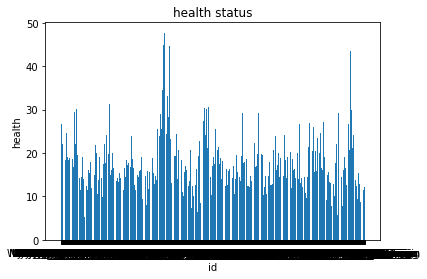

In [124]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

plt.xticks(range(len(data)), labels)
plt.xlabel('id')
plt.ylabel('health')
plt.title('health status')
plt.bar(range(len(data)), data) 
plt.show()

### build a sorted bar plot for health status

In [126]:
## get all dataframe without "not report"
df[df["Health_Status"]!= -1111.1]

id  Strata_ID_Number  Population_Density  Poverty  \
0        Autauga_Alabama                29                  82     10.4   
1        Baldwin_Alabama                16                 102     10.2   
2        Barbour_Alabama                51                  32     22.1   
3           Bibb_Alabama                42                  35     16.8   
4         Blount_Alabama                28                  86     11.9   
...                  ...               ...                 ...      ...   
3136  Sweetwater_Wyoming                77                   4      8.6   
3137       Teton_Wyoming                78                   5      5.6   
3138       Uinta_Wyoming                38                  10     10.6   
3139    Washakie_Wyoming                82                   4     11.1   
3140      Weston_Wyoming                78                   3      9.9   

      Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  \
0             26.9       62.3        9.8              0.9   
1             23.5       60.3       14.5              1.8   
2             24.3       62.5       11.6              1.6   
3             24.6       63.3       10.9              1.2   
4             24.5       62.1       12.1              1.3   
...            ...        ...        ...              ...   
3136          26.6       65.1        7.4              0.9   
3137          18.8       73.3        7.5              0.4   
3138          29.1       63.1        7.0              0.8   
3139          23.5       59.5       14.6              2.3   
3140          20.1       63.2       14.4              2.4   

      Max_Age_85_and_Over  Unemployed  ...  Diabetes  Uninsured  \
0                     2.1         774  ...      14.2       5690   
1                     3.4        2533  ...       7.2      19798   
2                     1.8         569  ...       6.6       5126   
3                     2.1         358  ...      13.1       3315   
4                     2.1         819  ...       8.4       8131   
...                   ...         ...  ...       ...        ...   
3136                  2.3         688  ...       5.3       5477   
3137                  2.3         437  ...       2.4       1846   
3138                  2.2         389  ...       4.8       3007   
3139                  4.5         182  ...       9.4       1178   
3140                  2.3         128  ...       5.7        867   

      Elderly_Medicare  Disabled_Medicare  Prim_Care_Phys_Rate  Dentist_Rate  \
0                 4762               1209                 45.3          22.6   
1                22635               3839                 67.0          30.8   
2                 3288               1092                 45.8          24.6   
3                 2390                974                 41.8          18.6   
4                 5019               1300                 16.2          10.8   
...                ...                ...                  ...           ...   
3136              3260                572                 50.0          52.7   
3137              1393                 82                147.1          57.8   
3138              1431                357                 65.2          40.1   
3139              1338                136                 50.4          50.4   
3140              1072                143                 45.0          30.0   

      Community_Health_Center_Ind  HPSA_Ind  Health_Status  Unhealthy_Days  
0                               1         2           21.8             7.5  
1                               1         2           15.4             6.7  
2                               1         2           21.4         -1111.1  
3                               1         1           19.4         -1111.1  
4                               2         1           25.8             7.9  
...                           ...       ...            ...             ...  
3136                            2         1           12.1             6.2  
3137  

In [127]:
## get needed column for ploting
df_try=df[df["Health_Status"]!= -1111.1][["id","Health_Status"]]
df_try

id  Health_Status
0        Autauga_Alabama           21.8
1        Baldwin_Alabama           15.4
2        Barbour_Alabama           21.4
3           Bibb_Alabama           19.4
4         Blount_Alabama           25.8
...                  ...            ...
3136  Sweetwater_Wyoming           12.1
3137       Teton_Wyoming            6.0
3138       Uinta_Wyoming           12.6
3139    Washakie_Wyoming           14.9
3140      Weston_Wyoming           16.1

[2477 rows x 2 columns]

In [130]:
df_sorted=df_try.sort_values(by=['Health_Status'])
df_sorted

id  Health_Status
296           Routt_Colorado            2.2
268        Gunnison_Colorado            2.6
975          Sheridan_Kansas            3.0
260         Douglas_Colorado            4.2
1343       Jackson_Minnesota            4.2
...                      ...            ...
1016           Clay_Kentucky           43.5
3014  McDowell_West Virginia           43.6
1109          Wolfe_Kentucky           44.6
1056         Leslie_Kentucky           44.9
1064       McCreary_Kentucky           47.7

[2477 rows x 2 columns]

In [132]:
data2=df_sorted['Health_Status']
label2=df_sorted["id"]

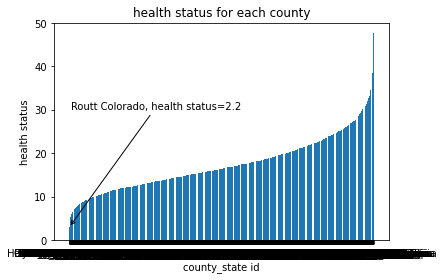

In [136]:
plt.xticks(range(len(data2)), label2)
plt.xlabel('county_state id')
plt.ylabel('health status')
plt.title('health status for each county')
plt.bar(range(len(data2)), data2)
plt.annotate(
        'Routt Colorado, health status=2.2',
        xy=(1, 3), arrowprops=dict(arrowstyle='->'), xytext=(15, 30))
plt.show()

#### ** It's clear to use annotation to highlight the point with lowest health status, but the the county labels represented in x-axis are jammed

### Use Tableau to present 

<img height="350" width="500" src="bar1.PNG"> 
<img height="350" width="500" src="bar2.PNG" /> 

#### ** could zoom in to see the graph clearly or click bars to get more information(displays on the righ), but it's still hard to see whole data  

<img height="350" width="500" src="box2.PNG" /> 

#### ** It's clear to see whole data point and which counties have low health status, and could click dots for more information

### Check each independent variables for null value

In [27]:
## get all dataframe without "not report"
df_start=df[df["Health_Status"]!= -1111.1]
df_start.head(7)

id  Strata_ID_Number  Population_Density  Poverty  \
0  Autauga_Alabama                29                  82     10.4   
1  Baldwin_Alabama                16                 102     10.2   
2  Barbour_Alabama                51                  32     22.1   
3     Bibb_Alabama                42                  35     16.8   
4   Blount_Alabama                28                  86     11.9   
6   Butler_Alabama                76                  27     20.0   
7  Calhoun_Alabama                 6                 184     16.4   

   Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  Max_Age_85_and_Over  \
0          26.9       62.3        9.8              0.9                  2.1   
1          23.5       60.3       14.5              1.8                  3.4   
2          24.3       62.5       11.6              1.6                  1.8   
3          24.6       63.3       10.9              1.2                  2.1   
4          24.5       62.1       12.1              1.3                  2.1   
6          25.6       58.5       13.6              2.4                  2.6   
7          24.1       61.6       12.7              1.5                  2.7   

   Unemployed  ...  Diabetes  Uninsured  Elderly_Medicare  Disabled_Medicare  \
0         774  ...      14.2       5690              4762               1209   
1        2533  ...       7.2      19798             22635               3839   
2         569  ...       6.6       5126              3288               1092   
3         358  ...      13.1       3315              2390                974   
4         819  ...       8.4       8131              5019               1300   
6         537  ...       9.5       4055              3150                952   
7        2182  ...      11.2      16456             16440               5301   

   Prim_Care_Phys_Rate  Dentist_Rate  Community_Health_Center_Ind  HPSA_Ind  \
0                 45.3          22.6                            1         2   
1                 67.0          30.8                            1         2   
2                 45.8          24.6                            1         2   
3                 41.8          18.6                            1         1   
4                 16.2          10.8                            2         1   
6                 43.3          19.3                            1         2   
7                 75.8          41.9                            1         2   

   Health_Status  Unhealthy_Days  
0           21.8             7.5  
1           15.4             6.7  
2           21.4         -1111.1  
3           19.4         -1111.1  
4           25.8             7.9  
6           21.6             6.9  
7           26.7             8.0  

[7 rows x 50 columns]

In [28]:
## take one column for trial
df_start[df_start["Population_Density"]<0].shape

(1, 50)

In [30]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 3140
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2477 non-null   object 
 1   Strata_ID_Number             2477 non-null   int64  
 2   Population_Density           2477 non-null   int64  
 3   Poverty                      2477 non-null   float64
 4   Age_19_Under                 2477 non-null   float64
 5   Age_19_64                    2477 non-null   float64
 6   Age_65_84                    2477 non-null   float64
 7   Age_85_and_Over              2477 non-null   float64
 8   Max_Age_85_and_Over          2477 non-null   float64
 9   Unemployed                   2477 non-null   int64  
 10  Sev_Work_Disabled            2477 non-null   int64  
 11  Major_Depression             2477 non-null   int64  
 12  Recent_Drug_Use              2477 non-null   int64  
 13  Ecol_Rpt          

In [35]:
print(df_start["id"].dtypes)
print(df_start["Smoker"].dtypes)

object
float64


In [40]:
null_ls={}
for col in df_start.columns.to_list():
    print("column:",col )
    if df_start[col].dtypes !=object:
        num=len(df_start[df_start[col]<0].index)
        null_ls[col]=num
        print("numbers of null in the column is",num )

column: id
column: Strata_ID_Number
numbers of null in the column is 0
column: Population_Density
numbers of null in the column is 1
column: Poverty
numbers of null in the column is 0
column: Age_19_Under
numbers of null in the column is 0
column: Age_19_64
numbers of null in the column is 0
column: Age_65_84
numbers of null in the column is 0
column: Age_85_and_Over
numbers of null in the column is 0
column: Max_Age_85_and_Over
numbers of null in the column is 0
column: Unemployed
numbers of null in the column is 7
column: Sev_Work_Disabled
numbers of null in the column is 1
column: Major_Depression
numbers of null in the column is 0
column: Recent_Drug_Use
numbers of null in the column is 0
column: Ecol_Rpt
numbers of null in the column is 1
column: Salm_Rpt
numbers of null in the column is 1
column: Shig_Rpt
numbers of null in the column is 1
column: Toxic_Chem
numbers of null in the column is 402
column: Carbon_Monoxide_Ind
numbers of null in the column is 0
column: Nitrogen_Dioxid

#### The amount of null/ no report values for each factor 

In [41]:
print(null_ls)

{'Strata_ID_Number': 0, 'Population_Density': 1, 'Poverty': 0, 'Age_19_Under': 0, 'Age_19_64': 0, 'Age_65_84': 0, 'Age_85_and_Over': 0, 'Max_Age_85_and_Over': 0, 'Unemployed': 7, 'Sev_Work_Disabled': 1, 'Major_Depression': 0, 'Recent_Drug_Use': 0, 'Ecol_Rpt': 1, 'Salm_Rpt': 1, 'Shig_Rpt': 1, 'Toxic_Chem': 402, 'Carbon_Monoxide_Ind': 0, 'Nitrogen_Dioxide_Ind': 0, 'Sulfur_Dioxide_Ind': 0, 'Ozone_Ind': 0, 'Particulate_Matter_Ind': 0, 'Lead_Ind': 0, 'FluB_Rpt': 1, 'HepA_Rpt': 1, 'HepB_Rpt': 1, 'Meas_Rpt': 1, 'Pert_Rpt': 1, 'CRS_Rpt': 1, 'Syphilis_Rpt': 1, 'Pap_Smear': 944, 'Mammogram': 1585, 'Proctoscopy': 1573, 'Pneumo_Vax': 1792, 'Flu_Vac': 1712, 'No_Exercise': 298, 'Few_Fruit_Veg': 603, 'Obesity': 294, 'High_Blood_Pres': 958, 'Smoker': 261, 'Diabetes': 7, 'Uninsured': 2, 'Elderly_Medicare': 2, 'Disabled_Medicare': 2, 'Prim_Care_Phys_Rate': 0, 'Dentist_Rate': 1, 'Community_Health_Center_Ind': 0, 'HPSA_Ind': 0, 'Health_Status': 0, 'Unhealthy_Days': 45}


In [42]:
print("the column that has null more than 100")
for col in null_ls.keys():
    if null_ls[col]>100:
        print(col, "with",null_ls[col], "nulls")

the column that has null more than 100
Toxic_Chem with 402 nulls
Pap_Smear with 944 nulls
Mammogram with 1585 nulls
Proctoscopy with 1573 nulls
Pneumo_Vax with 1792 nulls
Flu_Vac with 1712 nulls
No_Exercise with 298 nulls
Few_Fruit_Veg with 603 nulls
Obesity with 294 nulls
High_Blood_Pres with 958 nulls
Smoker with 261 nulls


#### Drop columns with null/no report data greater than 100

In [44]:
drop_ls=["Toxic_Chem","Pap_Smear","Mammogram","Proctoscopy","Pneumo_Vax","Flu_Vac","No_Exercise","Few_Fruit_Veg",\
        "Obesity","High_Blood_Pres","Smoker"]
df2 = df_start.drop(drop_ls, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 3140
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2477 non-null   object 
 1   Strata_ID_Number             2477 non-null   int64  
 2   Population_Density           2477 non-null   int64  
 3   Poverty                      2477 non-null   float64
 4   Age_19_Under                 2477 non-null   float64
 5   Age_19_64                    2477 non-null   float64
 6   Age_65_84                    2477 non-null   float64
 7   Age_85_and_Over              2477 non-null   float64
 8   Max_Age_85_and_Over          2477 non-null   float64
 9   Unemployed                   2477 non-null   int64  
 10  Sev_Work_Disabled            2477 non-null   int64  
 11  Major_Depression             2477 non-null   int64  
 12  Recent_Drug_Use              2477 non-null   int64  
 13  Ecol_Rpt          

In [45]:
df_t=df2

#### Fill the rest of the null/ not report data with median of each column

In [46]:
for col in df_t.columns.to_list():
    if df_t[col].dtypes !=object:
        df_t[col]=df_t[col].replace(-2222,df_t[col].median())
        df_t[col]=df_t[col].replace(-2222.2,df_t[col].median())
        df_t[col]=df_t[col].replace(-9999,df_t[col].median())
        df_t[col]=df_t[col].replace(-1111.1,df_t[col].median())    

In [47]:
df_t.head()

id  Strata_ID_Number  Population_Density  Poverty  \
0  Autauga_Alabama                29                  82     10.4   
1  Baldwin_Alabama                16                 102     10.2   
2  Barbour_Alabama                51                  32     22.1   
3     Bibb_Alabama                42                  35     16.8   
4   Blount_Alabama                28                  86     11.9   

   Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  Max_Age_85_and_Over  \
0          26.9       62.3        9.8              0.9                  2.1   
1          23.5       60.3       14.5              1.8                  3.4   
2          24.3       62.5       11.6              1.6                  1.8   
3          24.6       63.3       10.9              1.2                  2.1   
4          24.5       62.1       12.1              1.3                  2.1   

   Unemployed  ...  Diabetes  Uninsured  Elderly_Medicare  Disabled_Medicare  \
0         774  ...      14.2       5690              4762               1209   
1        2533  ...       7.2      19798             22635               3839   
2         569  ...       6.6       5126              3288               1092   
3         358  ...      13.1       3315              2390                974   
4         819  ...       8.4       8131              5019               1300   

   Prim_Care_Phys_Rate  Dentist_Rate  Community_Health_Center_Ind  HPSA_Ind  \
0                 45.3          22.6                            1         2   
1                 67.0          30.8                            1         2   
2                 45.8          24.6                            1         2   
3                 41.8          18.6                            1         1   
4                 16.2          10.8                            2         1   

   Health_Status  Unhealthy_Days  
0           21.8             7.5  
1           15.4             6.7  
2           21.4             6.0  
3           19.4             6.0  
4           25.8             7.9  

[5 rows x 39 columns]

### Save the cleaned data

In [48]:
## safe file
df_t.to_excel('df_t.xlsx')

### Visualization

In [49]:
# Exercise 4.1. Import plotting libraries

import seaborn as sns
import matplotlib.pyplot as plt

# plot charts inline
%matplotlib inline

#### the correlation between variables

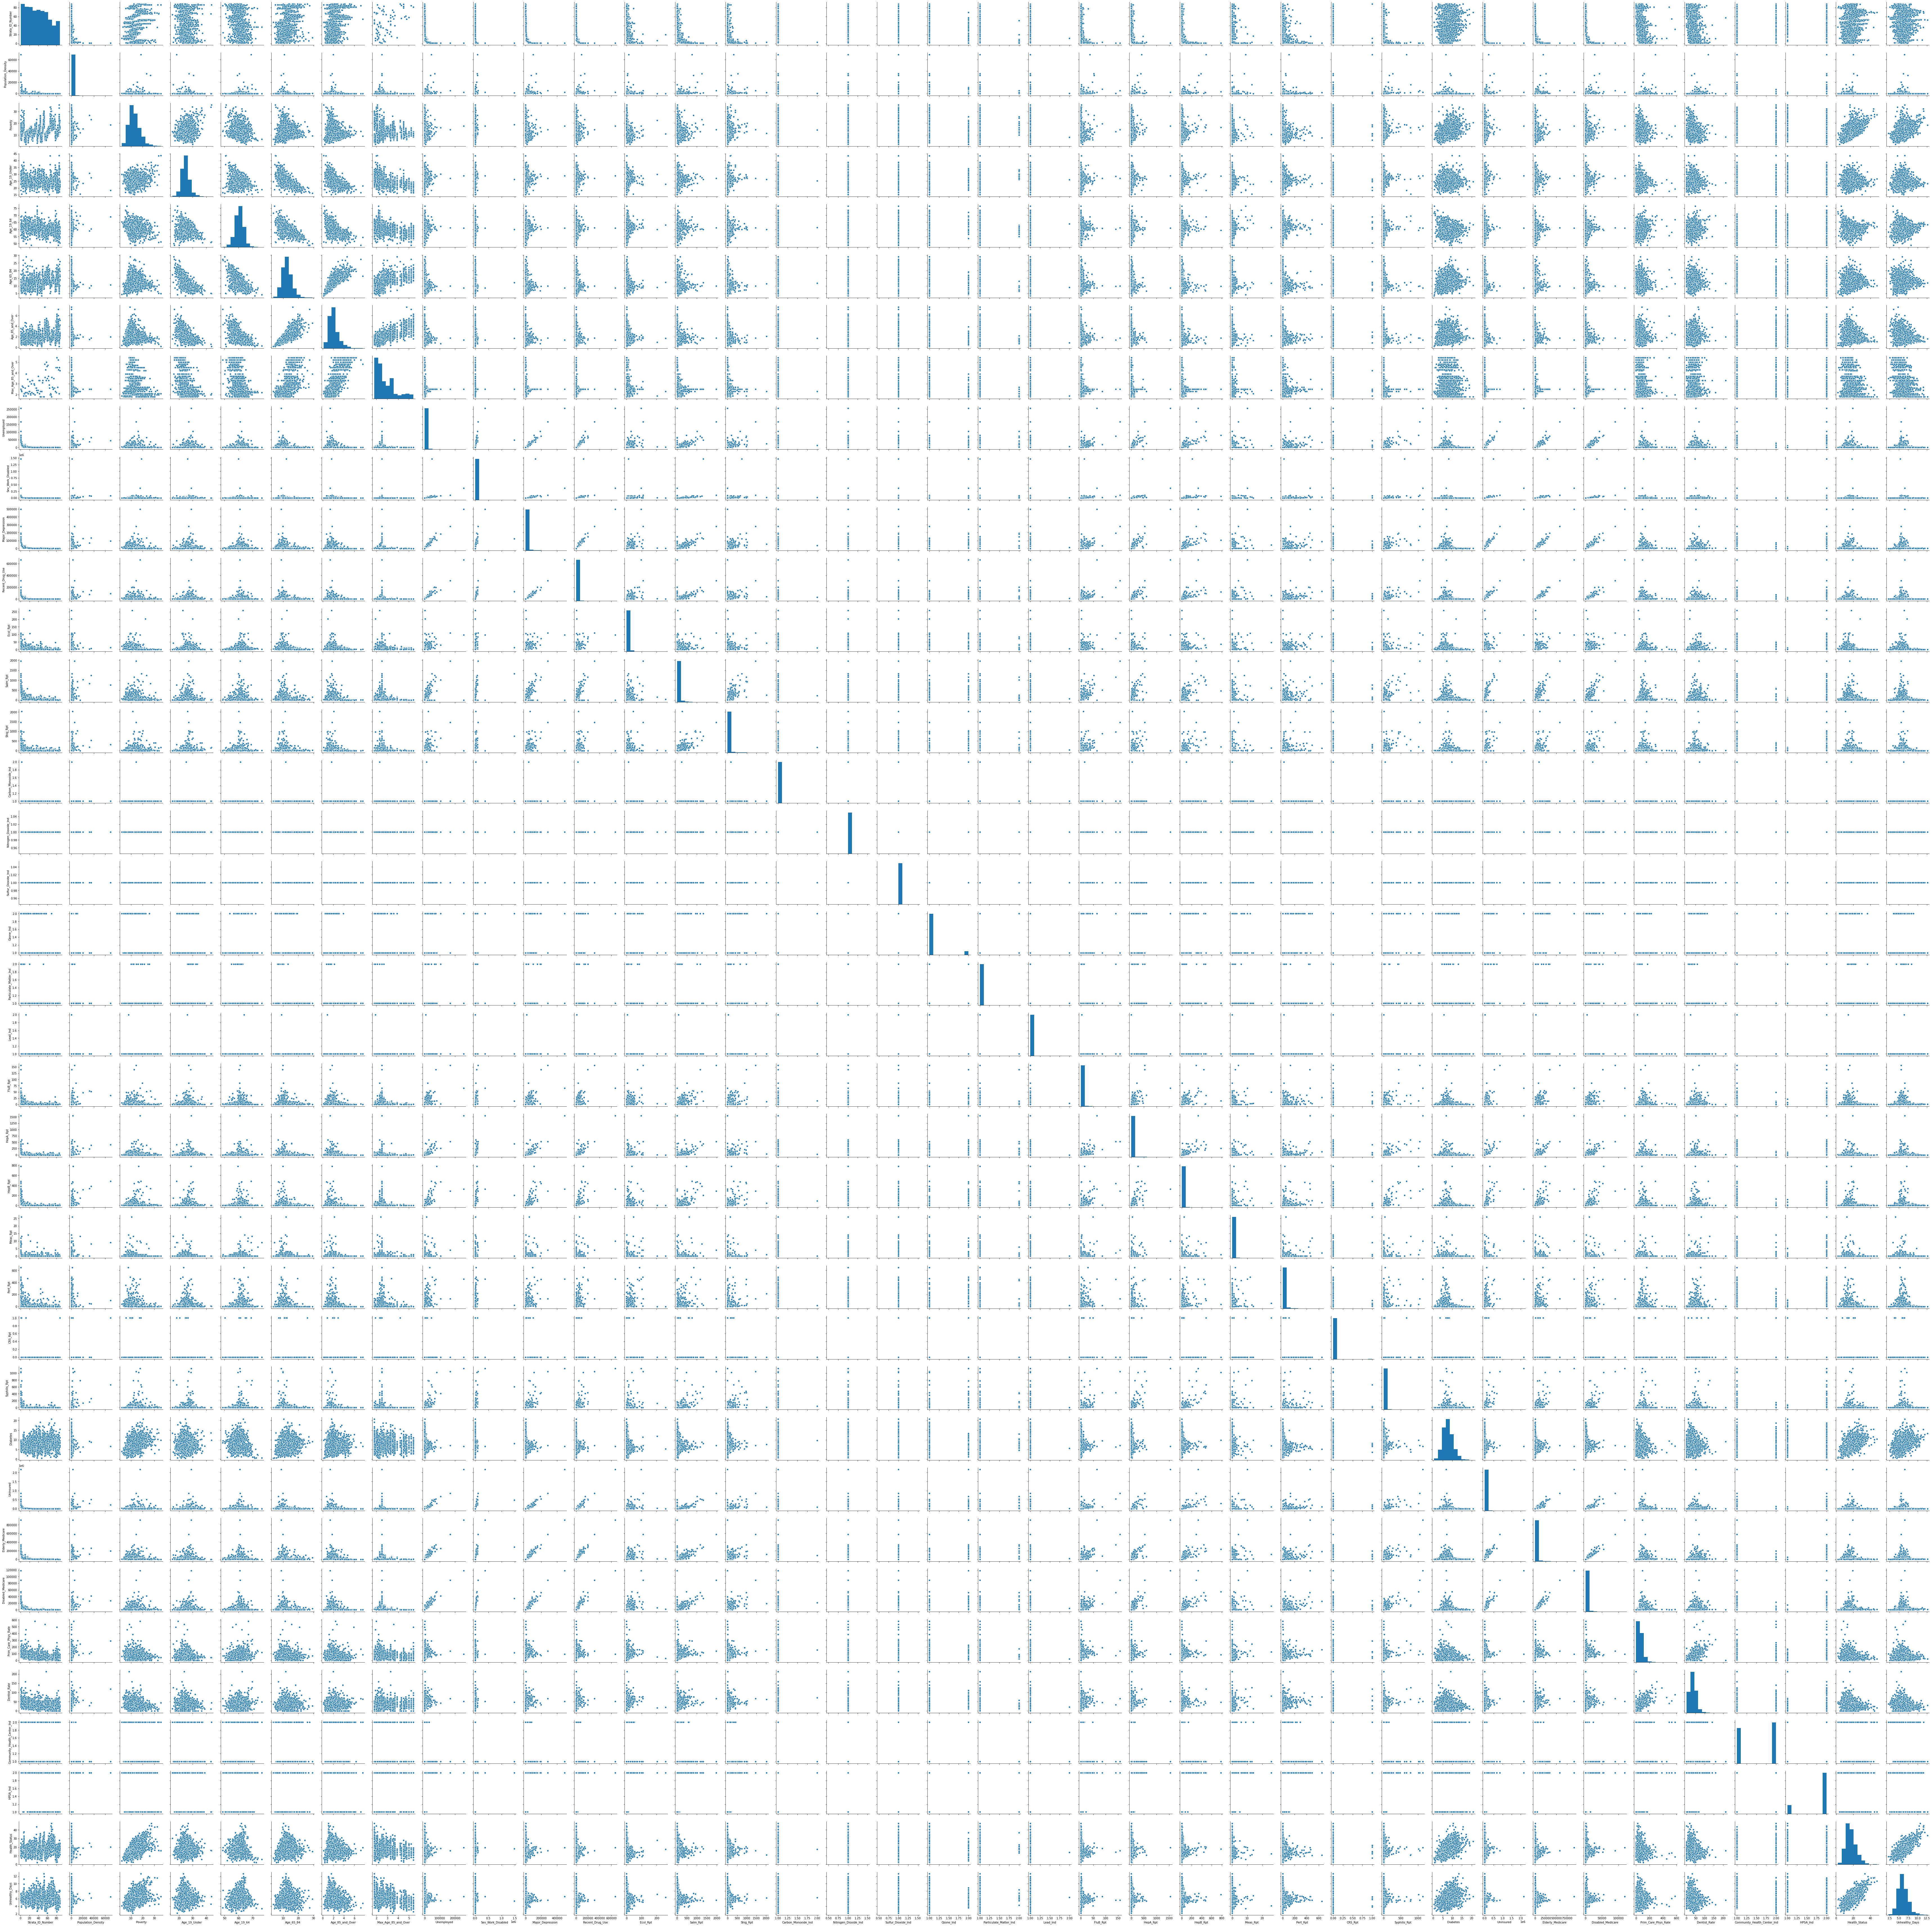

In [51]:
## Pairwise scatterplot
sns_plot = sns.pairplot(data=df_t)
sns_plot.savefig("scatterplot.png")

#### ** could get the plots with few lines of codes and visually see linear correlation for some variables, but basically the scatter plots are jammed 

### Use Tableau to present

<img height="350" width="500" src="scatter_tableau.PNG"> 

#### ** It's easy to drag and drop to build the plots and could zoom in and click for more information, but it's easy to get lost when there are too many features need to be dragged and dropped to sheet

In [54]:
## Variable correlation
corr=df_t.corr()
corr

Strata_ID_Number  Population_Density   Poverty  \
Strata_ID_Number                     1.000000           -0.184321  0.232114   
Population_Density                  -0.184321            1.000000  0.038799   
Poverty                              0.232114            0.038799  1.000000   
Age_19_Under                        -0.186646            0.003098  0.220480   
Age_19_64                           -0.344482            0.111060 -0.177096   
Age_65_84                            0.404501           -0.095088  0.007898   
Age_85_and_Over                      0.340250           -0.047011 -0.156887   
Max_Age_85_and_Over                  0.434122           -0.059223 -0.216347   
Unemployed                          -0.370823            0.340401 -0.012002   
Sev_Work_Disabled                   -0.136809            0.133755  0.031174   
Major_Depression                    -0.406387            0.350812 -0.048131   
Recent_Drug_Use                     -0.361306            0.312915 -0.035630   
Ecol_Rpt                            -0.320579            0.119966 -0.194064   
Salm_Rpt                            -0.412614            0.435870 -0.003598   
Shig_Rpt                            -0.287128            0.267324  0.076448   
Carbon_Monoxide_Ind                 -0.030157            0.003073  0.006459   
Nitrogen_Dioxide_Ind                      NaN                 NaN       NaN   
Sulfur_Dioxide_Ind                        NaN                 NaN       NaN   
Ozone_Ind                           -0.317572            0.089429 -0.087447   
Particulate_Matter_Ind              -0.100241            0.015912  0.065709   
Lead_Ind                            -0.022726            0.000267 -0.021125   
FluB_Rpt                            -0.330578            0.353903 -0.044727   
HepA_Rpt                            -0.244198            0.369303  0.034840   
HepB_Rpt                            -0.306311            0.526086  0.073347   
Meas_Rpt                            -0.116478            0.304129 -0.044656   
Pert_Rpt                            -0.276914            0.141295 -0.091880   
CRS_Rpt                             -0.043577            0.315545 -0.008645   
Syphilis_Rpt                        -0.188580            0.419363  0.100381   
Diabetes                             0.104989           -0.032340  0.423228   
Uninsured                           -0.290052            0.304194  0.038471   
Elderly_Medicare                    -0.410843            0.356755 -0.043468   
Disabled_Medicare                   -0.447928            0.375615  0.018066   
Prim_Care_Phys_Rate                 -0.339328            0.247337 -0.101284   
Dentist_Rate                        -0.344778            0.211116 -0.224227   
Community_Health_Center_Ind          0.299231           -0.104625 -0.198329   
HPSA_Ind                            -0.353894            0.062851 -0.232733   
Health_Status                        0.212070           -0.028654  0.651449   
Unhealthy_Days                       0.012285           -0.004547  0.464989   

                             Age_19_Under  Age_19_64  Age_65_84  \
Strata_ID_Number                -0.186646  -0.344482   0.404501   
Population_Density               0.003098   0.111060  -0.095088   
Poverty                          0.220480  -0.177096   0.007898   
Age_19_Under                     1.000000  -0.140771  -0.654482   
Age_19_64                       -0.140771   1.000000  -0.642419   
Age_65_84                       -0.654482  -0.642419   1.000000   
Age_85_and_Over                 -0.510139  -0.619786   0.779690   
Max_Age_85_and_Over             -0.440723  -0.478252   0.650984   
Unemployed                       0.156711   0.100121  -0.203525   
Sev_Work_Disabled                0.047372   0.023054  -0.053260   
Major_Depression                 0.144687   0.123444  -0.211879   
Recent_Drug_Use                  0.133548   0.109209  -0.193078   
Ecol_Rpt                         0.091331   0.133241  -0.192585   
Salm_Rpt 

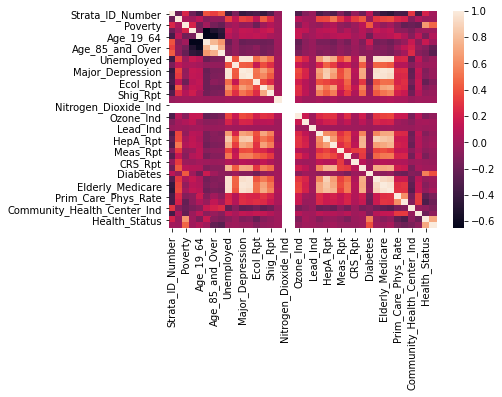

In [57]:
heatmap=sns.heatmap(corr)
figure=heatmap.get_figure() 
figure.savefig("heatmap.png")

#### ** It's easy to build with few lines of code, and it's clear to see which two factors have high correlation

In [62]:
## Features 
x = df_t.drop(["id","Strata_ID_Number","Health_Status","Unhealthy_Days"],1)  

## Target variables
y = df_t["Health_Status"]          

In [64]:
x

Population_Density  Poverty  Age_19_Under  Age_19_64  Age_65_84  \
0                     82     10.4          26.9       62.3        9.8   
1                    102     10.2          23.5       60.3       14.5   
2                     32     22.1          24.3       62.5       11.6   
3                     35     16.8          24.6       63.3       10.9   
4                     86     11.9          24.5       62.1       12.1   
...                  ...      ...           ...        ...        ...   
3136                   4      8.6          26.6       65.1        7.4   
3137                   5      5.6          18.8       73.3        7.5   
3138                  10     10.6          29.1       63.1        7.0   
3139                   4     11.1          23.5       59.5       14.6   
3140                   3      9.9          20.1       63.2       14.4   

      Age_85_and_Over  Max_Age_85_and_Over  Unemployed  Sev_Work_Disabled  \
0                 0.9                  2.1         774               1727   
1                 1.8                  3.4        2533               4933   
2                 1.6                  1.8         569               1302   
3                 1.2                  2.1         358                900   
4                 1.3                  2.1         819               2217   
...               ...                  ...         ...                ...   
3136              0.9                  2.3         688                817   
3137              0.4                  2.3         437                264   
3138              0.8                  2.2         389                408   
3139              2.3                  4.5         182                168   
3140              2.4                  2.3         128                245   

      Major_Depression  ...  CRS_Rpt  Syphilis_Rpt  Diabetes  Uninsured  \
0                 2680  ...        0             8      14.2       5690   
1                 9354  ...        0             0       7.2      19798   
2                 1618  ...        0             6       6.6       5126   
3                 1218  ...        0             2      13.1       3315   
4                 3164  ...        0             0       8.4       8131   
...                ...  ...      ...           ...       ...        ...   
3136              2649  ...        0             0       5.3       5477   
3137              1455  ...        0             0       2.4       1846   
3138              1347  ...        0             0       4.8       3007   
3139               576  ...        0             0       9.4       1178   
3140               504  ...        0             0       5.7        867   

      Elderly_Medicare  Disabled_Medicare  Prim_Care_Phys_Rate  Dentist_Rate  \
0                 4762               1209                 45.3          22.6   
1                22635               3839                 67.0          30.8   
2                 3288               1092                 45.8          24.6   
3                 2390                974                 41.8          18.6   
4                 5019               1300                 16.2          10.8   
...                ...                ...                  ...           ...   
3136              3260                572                 50.0          52.7   
3137              1393                 82                147.1          57.8   
3138              1431                357                 65.2          40.1   
3139              1338                136                 50.4          50.4   
3140              1072                143                 45.0          30.0   

      Community_Health_Center_Ind  HPSA_Ind  
0                               1         2  
1                               1         2  
2                               1         2  
3                               1         1  
4                               2         1  
...                           ...       ...  
3136                

### Feature selection
Reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [65]:
import statsmodels.api as sm

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [69]:
## Embedded Method
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 2074.074008
Best score using built-in LassoCV: 0.054555


In [70]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 32 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

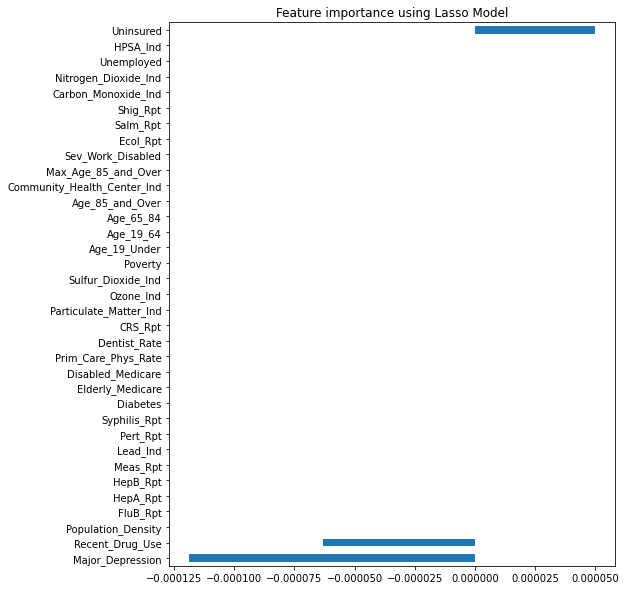

In [71]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### **3 variables are important: "Uninsured","Recent_Drug_Use",and "Major_Depression"

### Run OLS(ordinary least squares) regression 

In [73]:
## OLS(ordinary least squares) regression 
model = sm.OLS(y, df_t[["Uninsured","Recent_Drug_Use","Major_Depression"]]).fit();

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Health_Status   R-squared (uncentered):                   0.123
Model:                            OLS   Adj. R-squared (uncentered):              0.122
Method:                 Least Squares   F-statistic:                              115.6
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                    4.67e-70
Time:                        21:53:59   Log-Likelihood:                         -10560.
No. Observations:                2477   AIC:                                  2.113e+04
Df Residuals:                    2474   BIC:                                  2.114e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Uninsured        -9.911e-05   2.09e-05     -4.738      0.000      -0.000   -5.81e-05
Recent_Drug_Use     -0.0005   9.95e-05     -4.700      0.000      -0.001      -0.000
Major_Depression     0.0011   9.13e-05     12.061      0.000       0.001       0.001
==============================================================================
Omnibus:                      850.387   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6922.565
Skew:                          -1.393   Prob(JB):                         0.00
Kurtosis:                      10.701   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary: overall model is significant (Prob (F-statistic)), but this model only explain 12.2% (Adj. R-squared) of the health status